In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('..\Initial_data\K0T104_1\K0T104_1_cor.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_5748\3337525570.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K0T104_1\K0T104_1_cor.csv', ";")


K5PS14_1.PV  K5PS14_2.PV  K5L1_1.PV  K5L1_2.PV  K5L1_3.PV  K5L1_4.PV  \
0         4.062769     4.189256   12.69450   4.173750   1.531687   312.2457   
1         4.064288     4.190306   12.36375   4.173750   1.090688   312.2536   
2         4.065131     4.191300   12.37556   4.232812   1.289531   312.2162   
3         4.065431     4.192444   13.81078   4.681688   2.695219   312.2260   
4         4.066875     4.192631   13.85803   5.067563   2.718844   312.2950   
...            ...          ...        ...        ...        ...        ...   
25915     4.052325     4.160757   11.28684   3.191344   0.374063   313.7400   
25916     4.050862     4.159538   10.51509   2.821219   0.505969   313.8483   
25917     4.049325     4.158431   10.25916   2.705062  -0.289406   313.8680   
25918     4.049925     4.157700   11.11950   2.880281  -0.651656   313.8286   
25919     4.047863     4.157362   11.21794   2.346750  -0.693000   313.7676   

       K5P5_1.PV  K5P5_2.PV  K5BSB_1.PV  K5BSB_2.PV  ...  K5T12.PV  K5P13.PV  \
0      -40.84609  -40.91484    38.29781    56.14094  ...  149.8657  3.997919   
1      -39.48359  -38.33828    38.86625    57.16969  ...  149.8093  3.998653   
2      -39.93906  -40.55938    38.43406    55.34781  ...  149.8367  4.000594   
3      -40.66797  -40.74062    38.63844    54.76594  ...  149.9457  4.004294   
4      -40.02266  -39.07109    37.64219    56.70219  ...  150.0039  4.006975   
...          ...        ...         ...         ...  ...       ...       ...   
25915  -40.23672  -39.79063    38.24438    55.51906  ...       NaN       NaN   
25916  -38.01484  -39.49219    38.62250    57.77844  ...       NaN       NaN   
25917  -39.68828  -40.99766    37.78594    56.48781  ...       NaN       NaN   
25918  -42.10547  -40.63594    38.32094    57.19375  ...       NaN       NaN   
25919  -38.84844  -41.10234    38.63219    56.46188  ...       NaN       NaN   

       K5HCV60I.PV  K5P16_1.PV  K5GKAL.PV  K5HCV61I.PV  K5P16_2.PV  \
0         97.84505    0.784133   17.62373     97.57354    0.858941   
1         97.87302    0.746275   17.64795     97.48631    0.858940   
2         97.87021    0.782694   17.59481     97.51240    0.863576   
3         97.85599    0.768589   17.54865     97.53047    0.867372   
4         97.85573    0.783937   17.46280     97.54729    0.861497   
...            ...         ...        ...          ...         ...   
25915          NaN         NaN        NaN          NaN         NaN   
25916          NaN         NaN        NaN          NaN         NaN   
25917          NaN         NaN        NaN          NaN         NaN   
25918          NaN         NaN        NaN          NaN         NaN   
25919          NaN         NaN        NaN          NaN         NaN   

       K5FCV4_1I.PV  K5Q2_1.PV  K5P4_1.PV  
0             100.0   473.6719   15.01167  
1             100.0   475.4792   15.07297  
2             100.0   472.8542   15.07193  
3             100.0   471.4688   15.02687  
4             100.0   469.8177   15.14182  
...             ...        ...        ...  
25915           NaN        NaN        NaN  
25916           NaN        NaN        NaN  
25917           NaN        NaN        NaN  
25918           NaN        NaN        NaN  
25919           NaN        NaN        NaN  

[25920 rows x 53 columns]

<Axes: >

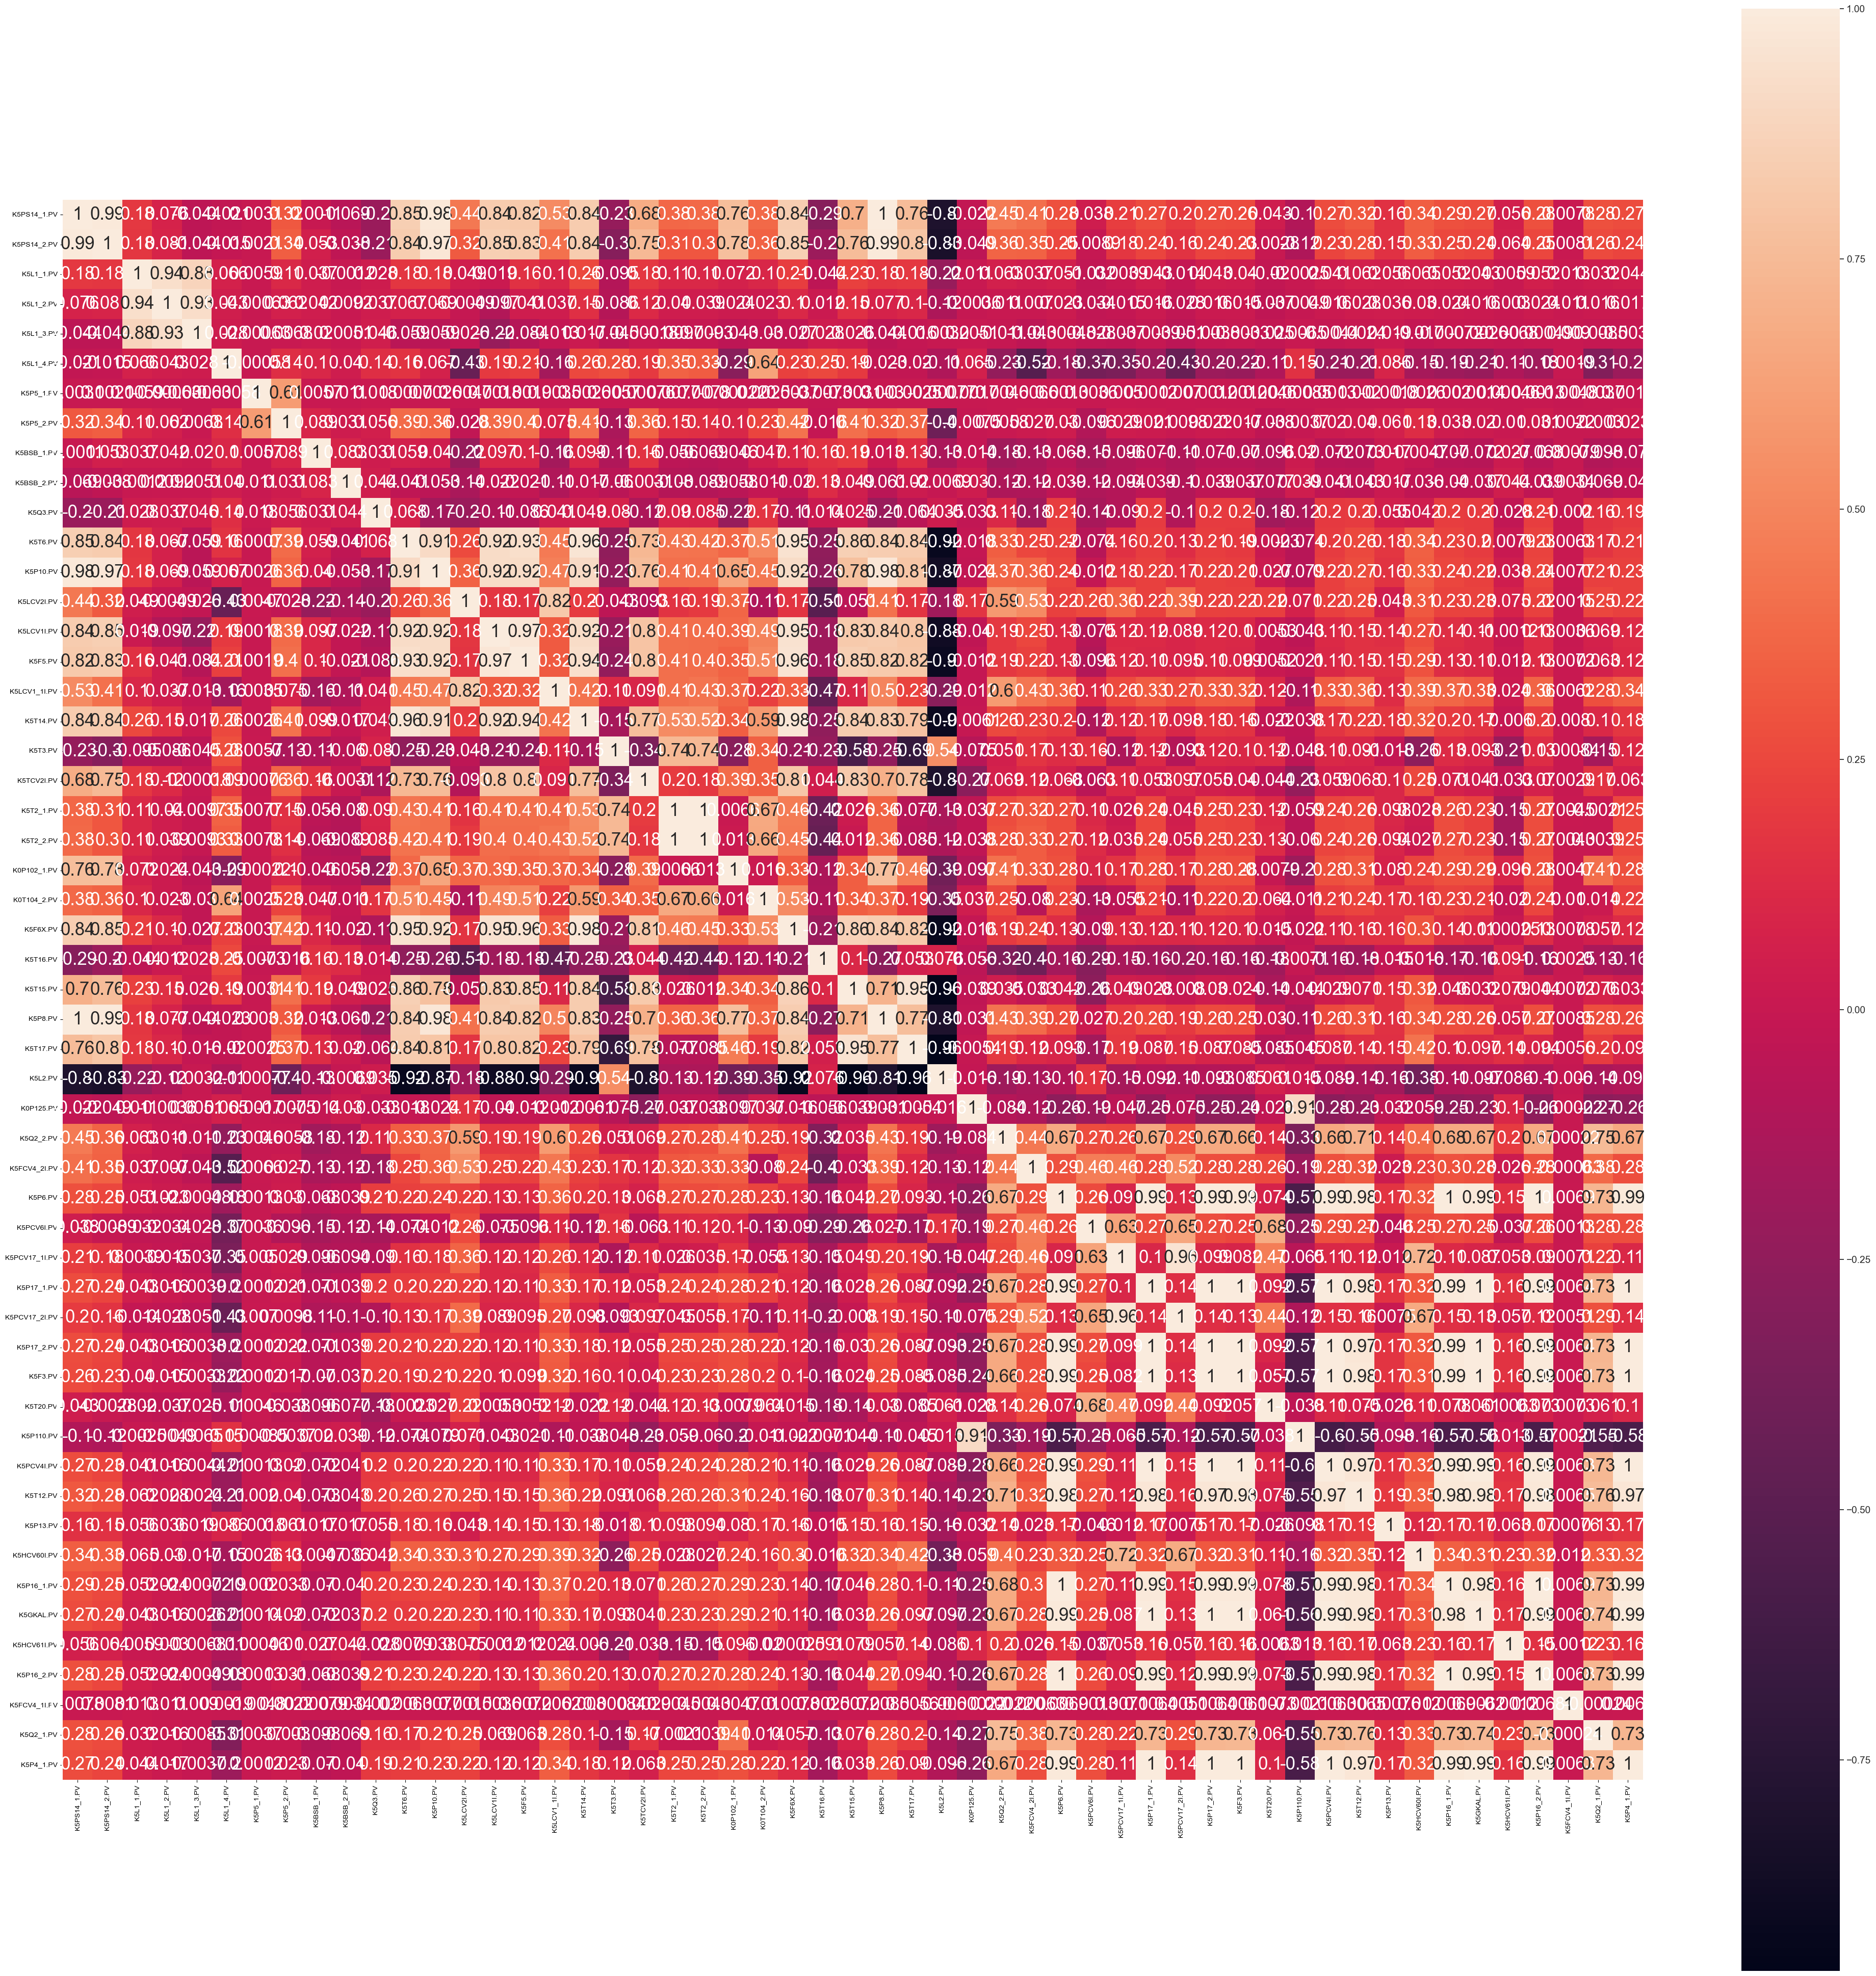

In [3]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [4]:
df = pd.read_csv('..\Initial_data\K0T104_1\K0T104_1.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_5748\1742244832.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K0T104_1\K0T104_1.csv', ";")


K5T2_1.PV  K0T104_2.PV
0       423.1312     417.1556
1       422.8669     417.1237
2       424.4156     417.1013
3       424.0331     417.0938
4       424.2656     417.0694
...          ...          ...
25915   415.5131     275.1131
25916   415.5056     275.0869
25917   415.5581     275.0344
25918   415.5113     274.9912
25919   415.5544     274.9819

[25920 rows x 2 columns]

In [5]:
df=df.dropna()
df=df.round(2)
df=df.drop_duplicates(["K5T2_1.PV"])
df=df.drop_duplicates(["K0T104_2.PV"])
df

K5T2_1.PV  K0T104_2.PV
0         423.13       417.16
1         422.87       417.12
2         424.42       417.10
3         424.03       417.09
4         424.27       417.07
...          ...          ...
23083     409.93       285.29
23194     416.40       284.98
23324     409.33       284.61
23767     409.44       283.42
25408     414.33       278.22

[1268 rows x 2 columns]

In [6]:
y = df.drop(['K5T2_1.PV'], axis=1)
x = df.drop(['K0T104_2.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)
task = np.linspace(400, 450, 100)[:, np.newaxis] # Точки для предсказания

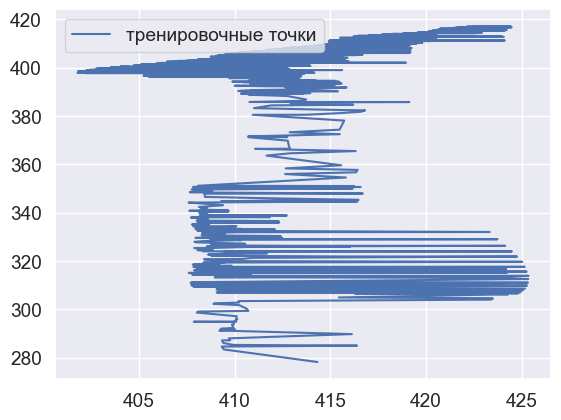

In [7]:
plt.plot(x, y, label = 'тренировочные точки') 
plt.legend(loc='upper left') 
plt.show()

C:\Users\arufa\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


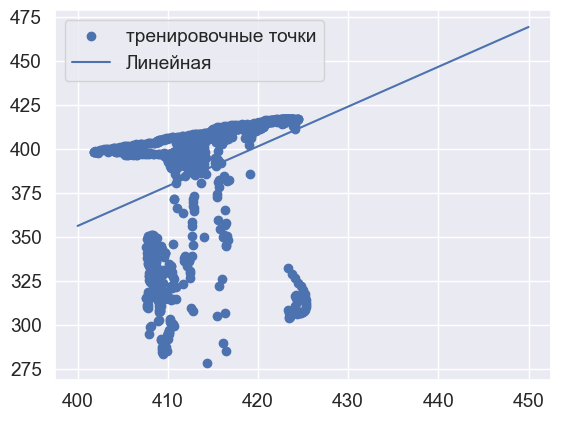

array([ 0.12094165, -0.01006217])

In [8]:
lr = LinearRegression() # Линейная регрессия
lr.fit(X_train, y_train) # Обучим линейную регрессию
F5 = lr.predict(task) # Предсказываем y для линейной регрессии
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, F5, label = 'Линейная') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(lr, X_test, y_test, cv=2)

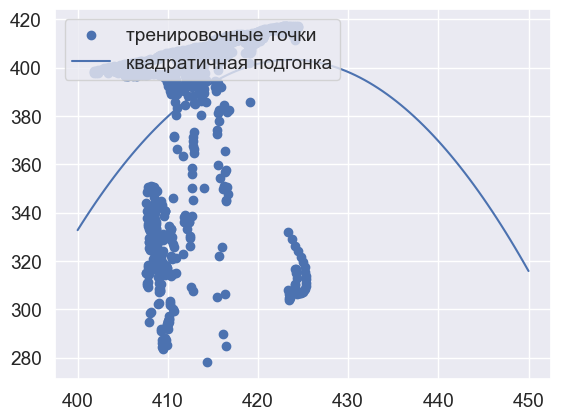

array([ 0.12094165, -0.01006217])

In [9]:
pr = LinearRegression() # Линейная регрессия
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_train)       # Преобразуем данные
pr.fit(X_quad, y_train) # Обучаем полиномиальную регрессию
y_pr = pr.predict(quadratic.fit_transform(task)) # Предсказываем y для полиномиальной регрессии

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr, X_test, y_test, cv=2)

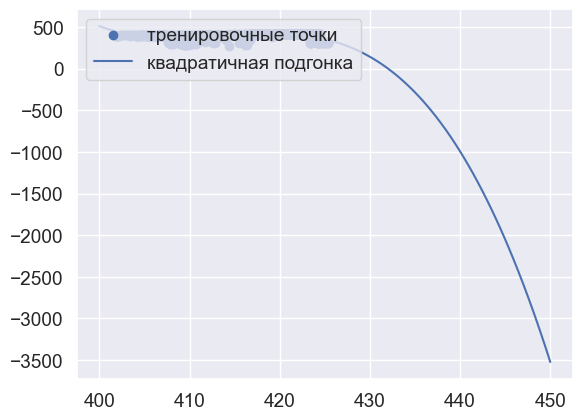

array([ 0.12094165, -0.01006217])

In [10]:
pr_3 = LinearRegression()
cube = PolynomialFeatures(degree=3)
X_cub = cube.fit_transform(X_train)   
pr_3.fit(X_cub, y_train)
y_pr = pr_3.predict(cube.fit_transform(task))
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_3, X_test, y_test, cv=2)

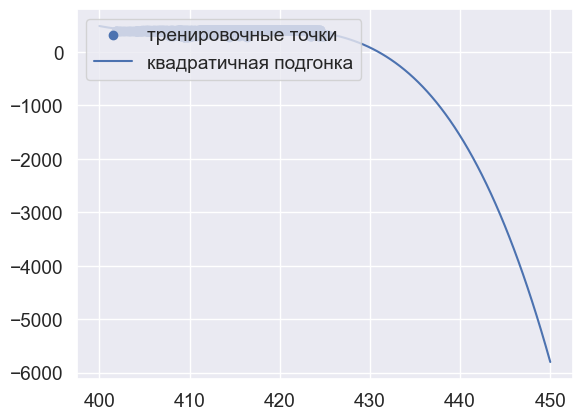

array([ 0.12094165, -0.01006217])

In [11]:
pr_4 = LinearRegression()
Fig = PolynomialFeatures(degree=4)
X_15 = Fig.fit_transform(X_train)   
pr_4.fit(X_15, y_train)
y_pr_4 = pr_4.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_4, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_4, X_test, y_test, cv=2)

C:\Users\arufa\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


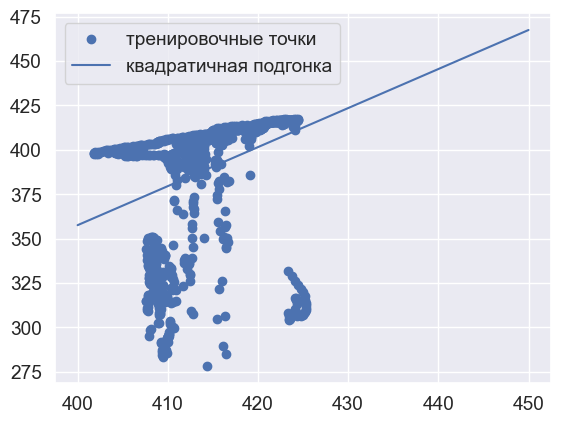

0.11256175927584877

In [12]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(x, y)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(x, y)
y_pr=clf.predict(task)
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
clf.score(X_test, y_test)

In [16]:
import pickle
filename = '../model/K0T104_2.sav'
pickle.dump(lr, open(filename, 'wb'))

In [19]:
loaded_model = pickle.load(open("../model/K0T104_2.sav", 'rb'))
#result = loaded_model.score(X_test, y_test)
cross_val_score(loaded_model, X_test, y_test, cv=100)

array([-1.60487960e+00,  6.92879785e-02, -5.53043201e+00,  5.89395575e-01,
        4.85924644e-01,  2.04311499e-02,  1.53627756e-01, -4.87116883e+00,
        6.03528529e-01,  4.43496482e-02, -6.37078645e+01, -3.97663084e+00,
       -1.09881575e-01, -1.60912433e+01, -1.55469914e+00,  5.45513430e-01,
       -3.33498733e+01, -7.84489050e-01,  2.04396072e-01, -3.33559011e+01,
       -7.56257936e-01, -1.68330560e-01, -4.41771540e-01, -3.16285205e+01,
       -7.72009471e+00,  1.30169545e-01, -3.82150277e+00, -2.64762873e-02,
       -8.97412319e+00,  2.48127668e-01, -8.39892474e+00, -2.37799296e+01,
       -3.81547971e-01,  4.37520374e-01,  5.42887069e-01, -1.34738342e+01,
       -3.44279662e+01, -9.76228896e-01,  4.40439525e-01,  4.16264887e-01,
        6.85129472e-01, -7.84188408e+01, -1.68284064e+01, -1.29179921e+02,
        2.74396434e-01, -5.72180450e+01,  1.64725971e-01, -4.10989755e+00,
       -9.40264579e+00, -6.32509662e-01, -1.39298272e+00, -1.24896818e+01,
       -5.14677855e-02, -

In [20]:
a=np.array([[423]])

In [21]:
loaded_model.predict(a)

C:\Users\arufa\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[408.11578971]])